<a href="https://colab.research.google.com/github/NFalah25/ML-Naufal3A/blob/main/Kuis%202/Kuis2_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KUIS 2 Machine Learning -- OCR KTP
## Nama: Naufal Falah Wafiuddin
## NIM: 2141720129
## Kelas: TI - 3A
## Absen: 23





In [ ]:
class KTPInformation(object):
    def __init__(self):
        self.nik = ""
        self.nama = ""
        self.tempat_lahir = ""
        self.tanggal_lahir = ""
        self.jenis_kelamin = ""
        self.golongan_darah = ""
        self.alamat = ""
        self.rt = ""
        self.rw = ""
        self.kelurahan_atau_desa = ""
        self.kecamatan = ""
        self.agama = ""
        self.status_perkawinan = ""
        self.pekerjaan = ""
        self.kewarganegaraan = ""
        berlaku_hingga = "SEUMUR HIDUP"

In [ ]:
import cv2
import json
import re
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
from PIL import Image

class KTPOCR(object):
    def __init__(self, image):
        self.image = cv2.imread(image)
        self.gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        self.th, self.threshed = cv2.threshold(self.gray, 127, 255, cv2.THRESH_TRUNC)
        self.result = KTPInformation()
        self.master_process()

    def process(self, image):
        raw_extracted_text = pytesseract.image_to_string((self.threshed), lang="ind")
        return raw_extracted_text

    def word_to_number_converter(self, word):
        word_dict = {
            '|' : "1"
        }
        res = ""
        for letter in word:
            if letter in word_dict:
                res += word_dict[letter]
            else:
                res += letter
        return res


    def nik_extract(self, word):
        word_dict = {
            'b' : "6",
            'e' : "2",
        }
        res = ""
        for letter in word:
            if letter in word_dict:
                res += word_dict[letter]
            else:
                res += letter
        return res

    def extract(self, extracted_result):
        #print(extracted_result.replace('\n', ' -- '))
        for word in extracted_result.split("\n"):
            if "NIK" in word:
                word = word.split(':')
                self.result.nik = self.nik_extract(word[-1].replace(" ", ""))
                continue

            if "Nama" in word:
                word = word.split(':')
                self.result.nama = word[-1].replace('Nama ','')
                continue

            if "Tempat" in word:
                word = word.split(':')
                self.result.tanggal_lahir = re.search("([0-9]{2}\-[0-9]{2}\-[0-9]{4})", word[-1])[0]
                self.result.tempat_lahir = word[-1].replace(self.result.tanggal_lahir, '')
                continue

            if 'Darah' in word:
                self.result.jenis_kelamin = re.search("(LAKI-LAKI|LAKI|LELAKI|PEREMPUAN)", word)[0]
                word = word.split(':')
                try:
                    self.result.golongan_darah = re.search("(O|A|B|AB)", word[-1])[0]
                except:
                    self.result.golongan_darah = '-'
            if 'Alamat' in word:
                self.result.alamat = self.word_to_number_converter(word).replace("Alamat ","")
            if 'NO.' in word:
                self.result.alamat = self.result.alamat + ' '+word
            if "Kecamatan" in word:
                self.result.kecamatan = word.split(':')[1].strip()
            if "Desa" in word:
                wrd = word.split()
                desa = []
                for wr in wrd:
                    if not 'desa' in wr.lower():
                        desa.append(wr)
                self.result.kelurahan_atau_desa = ''.join(wr)
            if 'Kewarganegaraan' in word:
                self.result.kewarganegaraan = word.split(':')[1].strip()
            if 'Pekerjaan' in word:
                wrod = word.split()
                pekerjaan = []
                for wr in wrod:
                    if not '-' in wr:
                        pekerjaan.append(wr)
                self.result.pekerjaan = ' '.join(pekerjaan).replace('Pekerjaan', '').strip()
            if 'Agama' in word:
                self.result.agama = word.replace('Agama',"").strip()
            if 'Perkawinan' in word:
                self.result.status_perkawinan = word.split(':')[1]
            if "RT/RW" in word:
                word = word.replace("RT/RW",'')
                self.result.rt = word.split('/')[0].strip()
                self.result.rw = word.split('/')[1].strip()

    def master_process(self):
        raw_text = self.process(self.image)
        self.extract(raw_text)

    def to_json(self):
        return json.dumps(self.result.__dict__, indent=4)


Processing image: KTP_Tarista Dwi Silvia.jpeg


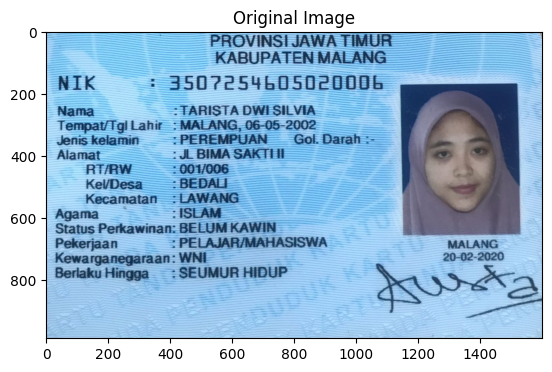

PROVINSI JAWA TIMUR

 

KABUPATEN MALANG

NIK : 350051605000006
Nama : TARISTA DWI SILVIA
Tempat/Tgi Lahir : MALANG, 06-05-2002
Jenis kelamin : PEREMPUAN Gol. Darah :-
Alamat : JL BIMA SAKTI II

RT/RW : 0601/9006

Kel/Desa : BEDALI

Kecamatan : LAWANG
Agama : ISLAM |
Status Perkawinan: BELUM KAWIN i 2.
Pekerjaan : PELAJAR/MAHASISWA MALANG
Kewarganegaraan: WNI 20-02-2020
Berlaku Hingga : : SEUMUR HIDUP -

——


Processing image: KTP_Arhan Windu Rizki Putra Budianto.jpg


PROVINSI JAWA TIMUR |
KOTA MALANI |

NIK 1 3571022501

Per

Nama ARHAN WINDU RIZKI PUTRA B
TampetTgiLahir - MALANG, 25-04-2003

Jera Ketaman | LAKI-LAKI Gol. Darah :-
Alamat dk. TELUK CENDRAWASIH 172

BTW : 9047002
Kel/Desa —: ARJOSARI
Kecamatan - BUMBING

Agama 2 ISLAM
Status Perkawinan: BELUM KAWIN
Pekerjaan : PELAJAR/MAHASISWA

Kewarganegaraan WNI
Bertaku Hingga SEUMUR HIDUP

 


Processing image: KTP_Diah Putri Nofianti.jpg


 

PROVINSI JAWA TIMUR

KABUPATEN MALANG

NIK : 350033491100 0004
Nama : DIAH PUTRI NOFIANTI
Tempat/Tgi Lahir : MALANG, 09-11-2002
Jaris kelamin . PEREMPUAN Gol. Darah :-
Alamat DSN SIDORUKUN

RT/RW : 015/003

KelDesa . CLUMPRIT

Kecamatan : PAGELARAN
Agama : ISLAM
Status Perkawinan: BELUM KAWIN
Pekerjaan : PELAJAR/MAHASISWA

Kewarganegaraan: WNI
Berlaku Hingga : : SEUMUR HIDUP

 

 


Processing image: KTP_Evi Amalia Midfia.jpg


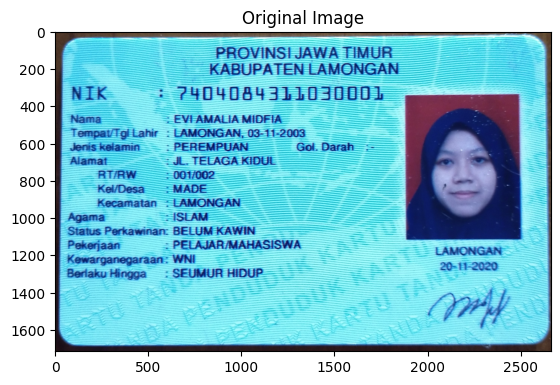

  
   
   
   
   
  
  
   
  
   

NIK

Nama
Tempat 'gi Lahur
Jenis kelamin
Alamat
RT/RW
Keli/Desa
Kecamatan
Agama
Status Perkawinan:
Pekerjaan
Kewarganegaraan :
Berlaku Hingga

: EVI AMALIA MIDFIA

. LAMONGAN, 03-11-2903

: PEREMPUAN Goi. Darah :-
1 JL. TELAGA KIDUL

: 0601/0902

. MADE

: LAMONGAN

- ISLAM

. PELAJAR/MAHASISWA

e PROVINSI JAWA TIMUR
KABUPATEN LAMONGAN
: 7101081311030001 Ta

 

BELUM KAWIN

LAMONGAN

NP 11 NA 29
—. 1 Tm

WNI

. SEUMUR HIDUP


Processing image: KTP_Muhammad Hatta.jpg


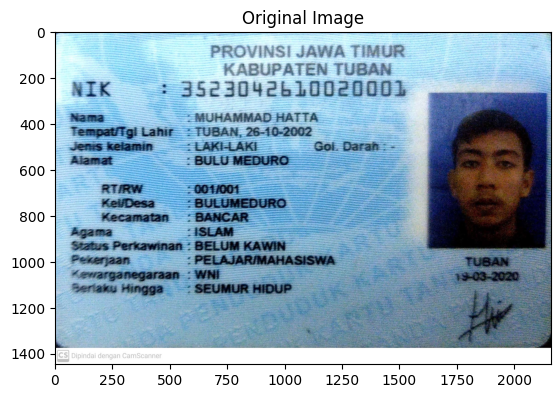

“IK : 3523012510020001
Gama . MUHAMMAD HATTA
Tempatitgi Lahir : TUBAN, 26-10-2002
jerns kelamin LAKI-LAKI Soi. Darah . -
Alamat 1 BULU MEDURO
RTRW : GO HOO1
KoifDesa : BULUMEDURO
Kecamatan  BANCAR
Agama ISLAM
Teatus Perkawinan : BELUM KAWIN
Pewarnaan ' PELAJAR/MAHASISWA

« rsargaregaraan | Wi
serak Jingga —— SEUMUR HIDUP

 


Processing image: KTP_M Rohmatul Mauludi.jpg


30VINSI JAWA TIMUR
ABUPATEN PASURUAN

NIK : 351419180503000U2
Nama : M. ROHMATUL MAULUDI
Tempat/Tgi Lahir : PASURUAN, 18-05-2003
Jenis kelamin : LAKI-LAKI Gol. Darah
Alamat : DUSUN BALUN

RT/RW : 001/005

Kei/Desa : GADING
Kecamatan - WINONGAN

 

Agama : ISLAM
Status Perkawinan: BELUM KAWIN
Pekerjaan : PELAJAR/MAHASISWA
: PASURUAN
Kewarganegaraan: WNI 21-07-2021

Berlaku Hingga : SEUMUR HIDUP


Processing image: KTP_Alwan Alawi.jpg


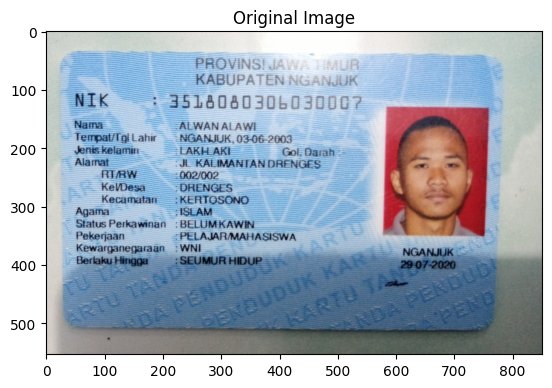

KAt

   
  
  
       
 
   
 
 
 
 
 
 

 

NIK 1 351806
Nama ALWAN ALAWI
Tempat/Tgi Lahir NGANJUK. 0366 2603
Jenis kelam LAKH AKI Gol. Darah
Alamat Jl KALIMANTAN DRF NGES
RTRW 0902/002
KelDesa DRENGES
Kecamatan — : KERTOSONO
Agama ISLAM
Status Perkawnan — BELUMKAWIN
Pekerjaan PELAJAR/MAHASISWA
Kewarganegaraan


Processing image: KTP_Rizky Angkata Putra Sasongko.jpg


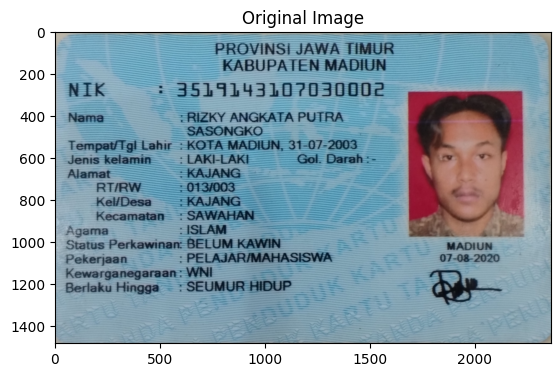

PROVINSI JAWA TIMUR
KABUPATEN MADIUN

NIK : 3519143107030002
Nama :RIZKY ANGKATA PUTRA
SASONGKO
Tempat/Tgi Lahir : KOTA MADIUN, 31-07-2003
Jenis kelamin : LAKI-LAKI Gol. Darah : -
Alamat : KAJANG
RT/RW "01379003

Kei/Desa " KAJANG
Kecamatan : SAWAHAN

   

Agama : ISLAM : sa f
Status Perkawinan: BELUM KAWIN MADIUN
Pekerjaan : PELAJAR/MAHASISWA 07-08-2020

Kewarganegaraan: WNI
Berlaku Hingga: SEUMUR HIDUP

Rg—

 


Processing image: KTP_Achmad Rachmandika.jpeg


PROVINSI JAWA TIMUR

 

: KABUPATEN MALANG
NIK : 3507250503000001
Nama - ACHMAD RACHMANDIKA
RIZKY PRATAMA

Tempat/Tgi Lahir : MALANG, 05-03-2000
Jenis kelamin 1 LAKI-LAKI Gol. Darah :-
Alamat - JL. NGAMARTO SELATAN

RT/RW :006/007

Kel/Desa : LAWANG

Kecamatan : LAWANG
Agama : ISLAM II
Status Perkawinan: BELUM KAWIN MALANG
Pekerjaan : PELAJAR/MAHASISWA 25-12-2017

Kewarganegaraan: WNI
Berlaku Hingga — : SEUMUR HIDUP


Processing image: KTP_Muhammad Haikal Buldan.jpg


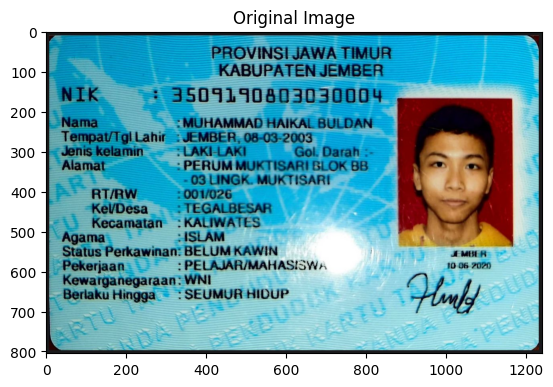

PROVINSI JAWA TIMUR
KABUPATEN JEMBER

NIK : 3509190803030004

Nama : MUHAMMAD HAIKAL BULDAN

Tempat/Tgi Lahir : JEMBER, 08-03-2003

Jenis kelamin PUAKI-LAKI Gol. Darah :-

Alamat : PERUM MUKTISARI BLOK 88
- 03 LINGK. MUKTISARI

RT/RW 1001/7026
Ke/Desa : TEGALBESAR
Kecamatan : KALIWATES
Agama -ISLAM
Status Perkawinan: BELUM KAWIN
Pekerjaan : PELAJAR/MAHASIS Ws, 10 06 2020

Kewarganegaraan: WNI
Berlaku Hingga — : SEUMUR HIDUP

A MBR

 


Processing image: KTP_AdityaKuncara.jpeg


aw

'esa
amalan

Nyama

status Porkawmnan

Pekerjaan

Kewarganegaraan

Berlaku Hingga

 

MRUS kot yA NA TIMUR
KABUPATEN LUMAJANG

1508165905020004

Api! CA KUN APA BAKTI

SA Aha LEE SAI
LAHi- ar HH: Gara
PERUM SURTAASHHT 15
Oia

WONGREAI
KEOLNGJAJANG
ISLAM

BELUM KAWIN

PEL AJAR/MAHASISWA
vi

SEUMUR HIDUP

 


Processing image: KTP_Widya Indah Puspita Sari.jpg


ma —
Lana apa

——

— T— En
AA — 5&——

 


Processing image: KTP_Abdullah Khafabi.jpg


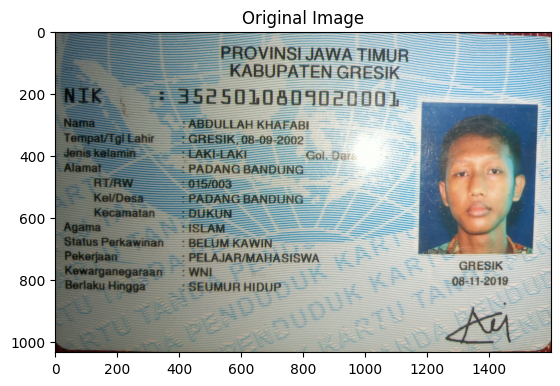

AA PELET S6 MULIA,

  
 
  
 

Musi JAWA TIMUR
KABUPATEN GRESik

    

   

: BEEUMKAWIN
-: PELAJAR/MAHASISWA
: WNI

— SEUMUR HIDUP

 

Ea A'
GRESIK
08-11-2019


Processing image: KTP_Yisha_Zukhrufin_A.jpg


NIK

Nama
Tempat Tg! Lahir
Jenis kelamin
Alamat
RTRW
Kelbesa
Kecamatan
Agama
Status Perkawnan
Pekerjaan
Kewarganegaraan
Berlaku Hingga

PROVINSI JAWA TIMUR
KABUPATEN NGANJUK

3518057/0086030003

»YISHA ZUK HRUFIN ANGELYNA
: NGANJUK, 3008-2003

. PEREMPUAN
"JL SURIKAYA
:002/009

: MLANDANGAN
: PACE

-ISLAM
 BELUMKAWIN
: PELAJAR/MAHASISWA
WNI

SEUMUR HIDUP

Gol. Darah : -

 

NGANJUK
3103-2021


Processing image: KTP_Kurniawati Agustina.jpeg


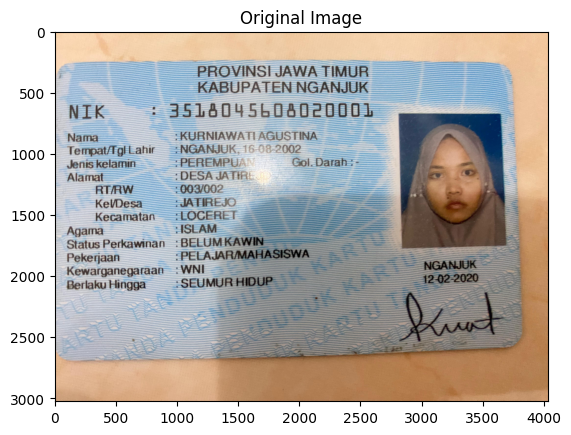

NIK

Nama
(empat/Tgi Lahu
Jenis kelamin
Alamat
RTRW
Ke/Desa
Kecamatan
Agama
Status Perkawnan
Pekerjaan
Kewarganegaraan
Berlaku Hingga

351804565080200041

: KURNIAW!
:NGANJI

: PEREMPI
DESA SA
:00N00-
JAURES ae  —
LOGERE | — ——e——
:ISLAM AA S5 ——
: BELUMKAW -—— 5 —
Anis LAJARMAHASISWA  E—-
:WNI 3 AS
: SEUMUR HIDUP-

PROVINSI JAWA TIMUR
KABUPATEN NGANJUK

  
  
  
 
  
  

SUS TINA

Sol. Darah :-


Processing image: KTP_Dandy Wahyu Syahputra.jpg


PROVINSI JAWA TIMUR
KABUPATEN JOMBANG

NIK : 45170011009000004

  
 
  
 
  

Nama "BANDY WAHYU SYAHPUTRA
Tempat'Tgi Lahir "SOMBANG, 10-09-2002
Jjeris kelaran YAKHAKI Got. Darah

Alamat ——— : DSN GODONGHI


Processing image: KTP_Naufal Falah Wafiuddin.jpeg


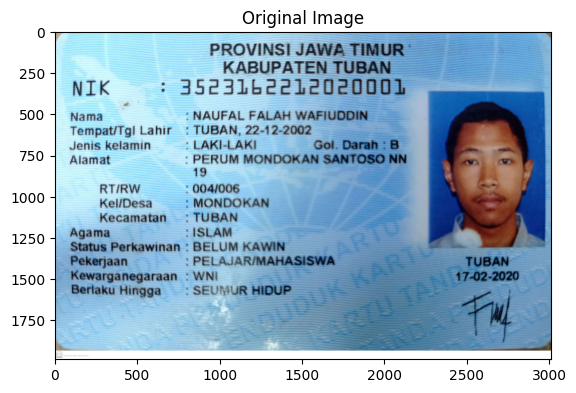

NIK

Nama

Tempat/Tgi Lahir
Jenis kelamin
Alamat

RT/RW
Kel/Desa
Kecamatan
Agama
Status Perkawinan
Pekerjaan
Kewarganegaraan
Berlaku Hingga

PROVINSI JAWA TIMUR

KABUPATEN TUBAN

35031b0010000001

 NAUFAL FALAH WAFIUDDIN
' TUBAN, 22-12-2002

LAKI-LAKI Gol. Darah : B
PERUM MONDOKAN SANTOSO NN
19

004/006

" MONDOKAN

TUBAN

“ISLAM

' BELUM KAWIN

' PELAJAR/MAHASISWA
"WNI

SEUN UR HIDUP

 


Processing image: KTP_Agus Prayogi.jpg


 

PROVINSI JAWA TIMUR
NIK 1 35077320608020002

SAGUS PRAYOGI

Tempat/Tgi Lahir : MALANG, 06-08-2002
Jenis kelamin "LAKI-LAKI Gol. Darah
Alamat : DSN KEBOBANG

RTRW 1003/001

Kel/Desa 1KEBOBANG

Kecamatan : WONOSARI
Agama #SLAM
Status Perkawinan: BELUM KAWIN
Pekerjaan : PELAJAR/MAHASISWA

Kewarganegaraan : WNI
Berlaku Hingga —: SEUMUR HIDUP

 


Processing image: KTP_Achmad Aly.jpg


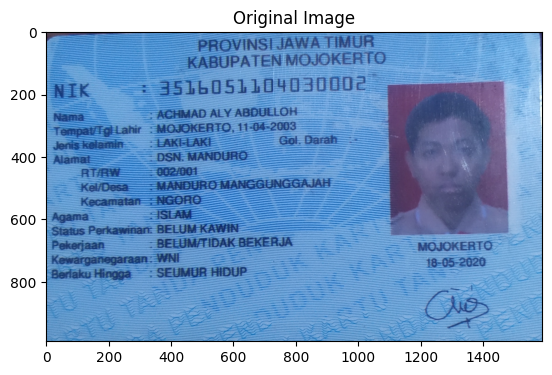

  
  
        

—— PROVINSI JAWA TIMUR
— KABUPATEN MOJOKER TO
35)5051104030002

KEHMAD ALY ABDUELOH
-MOJOKERTO, 11-04-2003 —

NI AE —
Beriaku Hingga — SEUMUR HIDUP “— — 2 nas aan


Processing image: KTP_Mirza Priscilla Faradiba.jpg


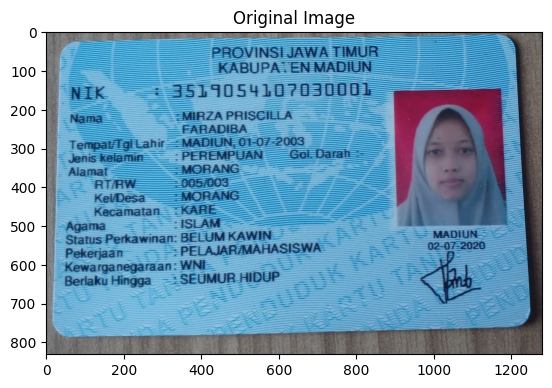

  
    

Agama Ne :
Status Perkawinan: BELUM KAWIN
Pekerjaan — PELAJARUMAHASISWA "
Pa WNI "5 n
Beriaku Hingga - 2 SEUMUR HIDUP


Processing image: KTP_Aido.jpg


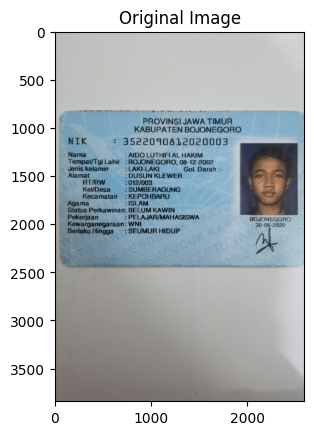

— —— — - - — -—

PROVINSI JAWA TIMUR

KABUPATEN BOJONEGORO
NIK : 3506001041020020003
Nama :AIDO LUTHFI AL HAKIM
Tempat/Tgi Lahir : BOJONEGORO, 08-12-2002
Jenis kelamin : LAKI-LAKI Gol. Darah :-
Alamat : DUSUN KLEWER
RT/RW :012/003

Kel/Desa : SUMBERAGUNG
Kecamatan : KEPOHBARU

Agama : ISLAM
- Status Perkawinan: BELUM KAWIN
Pekerjaan : PELAJAR/MAHASISWA

Kewarganegaraan: WNI
Berlaku Hingga  : SEUMUR HIDUP

   

BOJONEGORO
30-06-2020


Processing image: KTP_Alfan Farchi.jpg


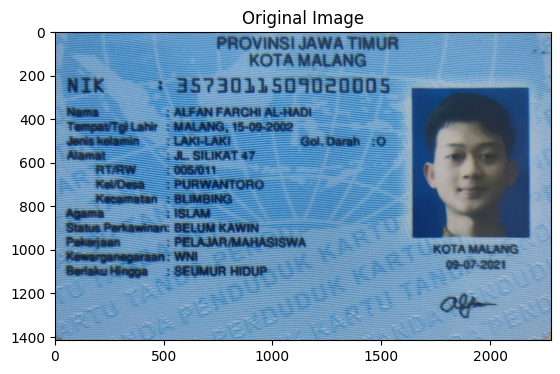

ae PROVINSI JAWA TIMUR
——— KOTA MALANG
NIK”: 3573011501020005

 

 

 

  


Processing image: KTP_Alfan Marcel Mulyawan_.jpg


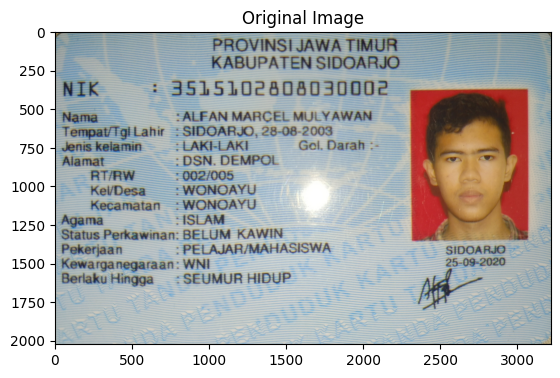

PROVINSI JAWA TIMUR
KABUPATEN SIDOARJO

NIK : 35151008080 30002

   

Nama " ALFAN MARCEL MJ YAWAN
Tempat/Tgi Lahir : SIDOARJO. 28-08 2003
Jenis kelamin » LAKI-LAKI Gol. Darah :
Alamat DSN. DEMPOI
RT/RW : 002/005
Kei/Desa ' WONOAYU
Kecamatan : WONOAYU
Agama ISLAM
Status Perkawinan: BELUM KAWIN BA in
Pekerjaan ' PELAJAR/MAHASISWA SIDOARJO
Kewarganegaraan: WNI 25-09-2020

Berlaku Hingga” SEUMUR HIDUP


Processing image: KTP_Tesya.jpg


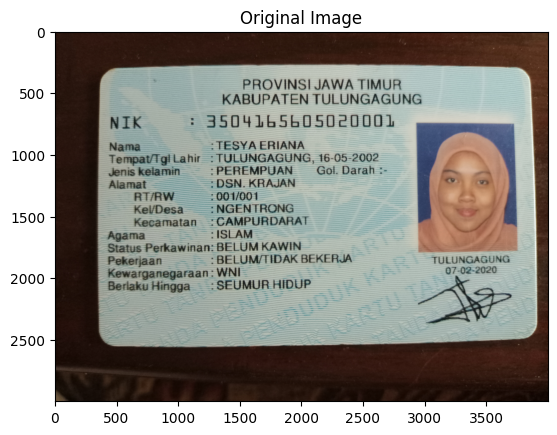

PROVINSI JAWA TIMUR
KABUPATEN TULUNGAGUNG

NIK : 35041656050 00LU1

Nama :TESYAERIANA
Tempat''giLahir : TULUNGAGUNG, 16-05-2002
Jenis kelamin : PEREMPUAN Gol. Darah :
Alamat : DSN. KRAJAN

RT/RW : 001/001

Kei/Desa : NGENTRONG

Kecamatan : CAMPURDARA |
Agama : ISLAM
Status Perkawinan: BELUM KAWIN
Pekerjaan : BELUM/TIDAK BEKERJA TULUNGAGUNG
Kewarganegaraan: WNI 07-02-2020
Berlaku Hingga — : SEUMUR HIDUP :

 



In [ ]:
class KTPOCR:
    def __init__(self, image_folder):
        self.image_folder = image_folder

    def process_image(self, image_path):
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        ## (2) Threshold
        th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)

        ## (3) Detect
        result = pytesseract.image_to_string(threshed, lang="ind")

        final = []

        ## (5) Normalize
        for word in result.split("\n"):
            if "”—" in word:
                word = word.replace("”—", ":")

            # normalize NIK
            if "NIK" in word:
                nik_char = word.split()
            if "?" in word:
                word = word.replace("?", "7")

            final.append(word)

        return final, img

    def display_info(self):
        for filename in os.listdir(self.image_folder):
            if filename.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(self.image_folder, filename)
                print(f"\nProcessing image: {filename}")
                extracted_data, image = self.process_image(image_path)

                # Display the original image
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.title('Original Image')
                plt.show()

                # Display extracted data
                for item in extracted_data:
                    print(item)

if __name__ == "__main__":
    try:
        image_folder = '/home/naufal/Kuliah/Machine Learning/KTP'
    except:
        image_folder = None
        print('Define your image folder path. Example: python ocr.py /path/of/image/folder')
    if image_folder:
        ocr = KTPOCR(image_folder)
        ocr.display_info()
